In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
file_path = './CC_preprocessed.csv'

In [3]:
data=pd.read_csv(file_path)
data=data.drop([data.columns[0]],axis=1)

In [4]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.784577,0.818182,-0.649794,-0.621380,-0.479334,-0.610964,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.964944,-0.782590,-0.691893,0.000000,0.36068
1,0.894892,0.909091,-0.733178,-0.621380,-0.664586,2.761295,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.693782,1.580002,0.640026,0.222222,0.36068
2,0.519154,1.000000,-0.057386,0.501997,-0.664586,-0.610964,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.832010,-0.528077,0.004565,0.000000,0.36068
3,0.079055,0.636364,0.577029,1.556591,-0.664586,-0.455200,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.832010,-0.904802,-0.445116,0.000000,0.36068
4,-0.371922,1.000000,-0.719193,-0.598132,-0.664586,-0.610964,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.909653,-0.494001,-0.541569,0.000000,0.36068


In [5]:
X=data.to_numpy()

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
Z = linkage(X, 'ward')

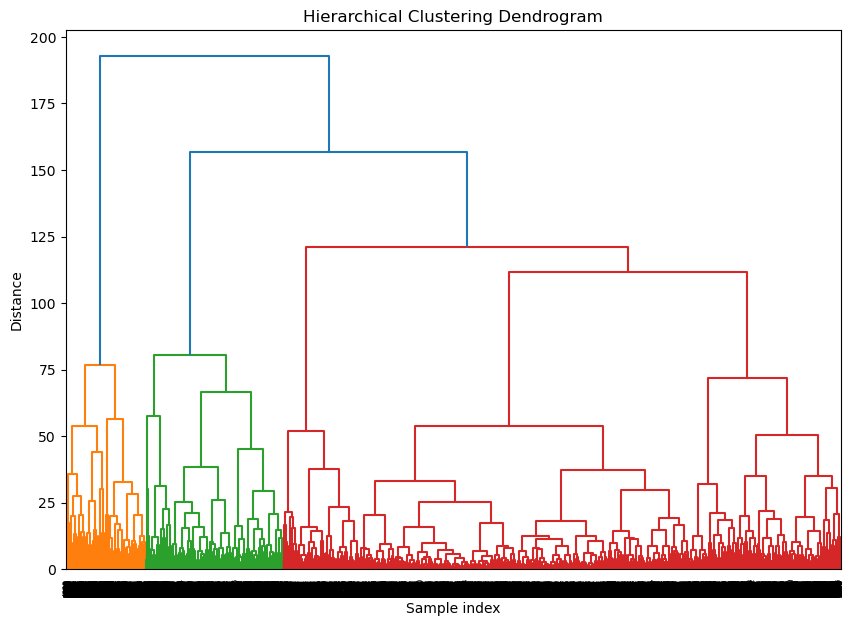

In [8]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Generate the dendrogram
dendrogram(Z)

# Display the plot
plt.show()

In [9]:
def distance(x1,x2):
  return np.sqrt(np.sum(np.array([(x1i-x2i)**2 for x1i,x2i in zip(x1,x2)])))

def single_link(c1,c2,data):
  return np.min(np.array([distance(data.iloc[v1],data.iloc[v2]) for v1 in c1 for v2 in c2]))

def complete_link(c1,c2,data):
  return np.max(np.array([distance(data.iloc[v1],data.iloc[v2]) for v1 in c1 for v2 in c2]))

def average_link(c1,c2,data):
  return np.average(np.array([distance(data.iloc[v1],data.iloc[v2]) for v1 in c1 for v2 in c2]))

In [10]:
class AgglomerativeHierarchicalClustering:
  def __init__(self,data,K,merge_measure):
    self.data=data
    self.N=len(data)
    self.K=K
    self.merge_history=[]
    if merge_measure=="single_link":
      self.measure=single_link
    elif merge_measure=="complete_link":
      self.measure=complete_link
    elif merge_measure=="average_link":
      self.measure=average_link

    self.clusters=self.initial_clusters()

  def initial_clusters(self):
    return {index:[index] for index in range(data.shape[0])}

  def find_closest_clusters(self):
    min_distance=math.inf
    closest_pair = (None, None)

    cluster_keys = list(self.clusters.keys())

    for i in range(len(cluster_keys)):
        for j in range(i + 1, len(cluster_keys)):
            c1 = cluster_keys[i]
            c2 = cluster_keys[j]
            distance = self.measure(self.clusters[c1], self.clusters[c2], self.data)

            if distance < min_distance:
                min_distance = distance
                closest_pair = (i, j)

    return closest_pair, min_distance

  def merge_clusters(self,i,j,distance):
    c1=self.clusters[i]
    c2=self.cluster[j]

    self.merge_history.append([c1,c2,distance])

    new_clusters={0:c1+c2}
    for cid in self.clusters.keys():
      if cid==i or cid==j:
        continue
      new_clusters[len(new_clusters.keys())] = self.clusters[cid]

    return new_clusters

  def run(self):
    while len(self.clusters.keys())>self.K:
      (i,j),dist=self.find_closest_clusters()
      self.clusters=self.merge_clusters(i,j,distance)

    return self.clusters

In [11]:
# cluster=AgglomerativeHierarchicalClustering(data,10,"single_link")
# cluster.run()

In [12]:
import numpy as np
from sklearn.cluster import KMeans

class DivisiveHierarchicalClustering:
    def __init__(self, data, K):
        self.data = data
        self.N = data.shape[0]
        self.K = K
        self.clusters = {0: list(range(self.N))}  # Start with one cluster containing all indices

    def find_cluster_to_split(self):
        max_size=0
        max_clusterid=-1
        for clusterid,data_indices in self.clusters.items():
          if len(data_indices)>max_size:
            max_size=len(data_indices)
            max_clusterid=clusterid

        return max_clusterid

    def split_cluster(self, cluster_index):
        points = self.data.iloc[self.clusters[cluster_index]]
        kmeans = KMeans(n_clusters=2, n_init=10,random_state=0).fit(points)
        labels = kmeans.labels_

        cluster_1 = [self.clusters[cluster_index][i] for i in range(len(points)) if labels[i] == 0]
        cluster_2 = [self.clusters[cluster_index][i] for i in range(len(points)) if labels[i] == 1]

        return cluster_1, cluster_2

    def run(self):
        while len(self.clusters) < self.K:
           
            cluster_to_split = self.find_cluster_to_split()


            cluster_1, cluster_2 = self.split_cluster(cluster_to_split)

            new_clusters = {}
            new_index = 0

        
            for key in self.clusters.keys():
                if key != cluster_to_split:
                    new_clusters[new_index] = self.clusters[key]
                    new_index += 1

        
            new_clusters[new_index] = cluster_1
            new_clusters[new_index + 1] = cluster_2

      
            self.clusters = new_clusters
   
        clustered_data = {}
        clustered_data_index={}
        for k, v in self.clusters.items():
            if v:  
                clustered_data[k] = self.data.iloc[v]
                clustered_data_index[k]=v
            else:
                print(f"Cluster {k} is empty.")

        return clustered_data,clustered_data_index




In [15]:
def compute_wcss(data, max_K):
    wcss_values = []

    for K in range(2, max_K + 1):  # Start from K=2 because divisive clustering splits into at least two clusters
        divisive_clustering=DivisiveHierarchicalClustering(data,K) # Set the current K in the divisive clustering algorithm
        clusters,c = divisive_clustering.run()  # Run the clustering for the current K

        # Compute WCSS for the current K
        wcss = 0
        for cluster in clusters.values():
            cluster1=cluster.to_numpy()
            cluster_centroid = np.mean(cluster1, axis=0)
            #print(cluster_centroid)
            for i in range(len(cluster1)):
              wcss += np.sum((cluster1[i,:] - cluster_centroid) ** 2)

        wcss_values.append(wcss)

    return wcss_values

def plot_wcss(wcss, max_K):
    plt.figure(figsize=(10, 6))
    print(range(1,max_K+1))
    print(wcss)
    plt.plot(range(2, max_K + 1), wcss, 'bo-', markerfacecolor='red')
    plt.title('Elbow Method for Determining Optimal K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()

range(1, 11)
[80359.32088734282, 65845.61844258892, 59705.128502680214, 56735.69381686121, 55646.57891339225, 53860.09689640216, 53470.4433833991, 48757.16211499107, 47923.74735573982]


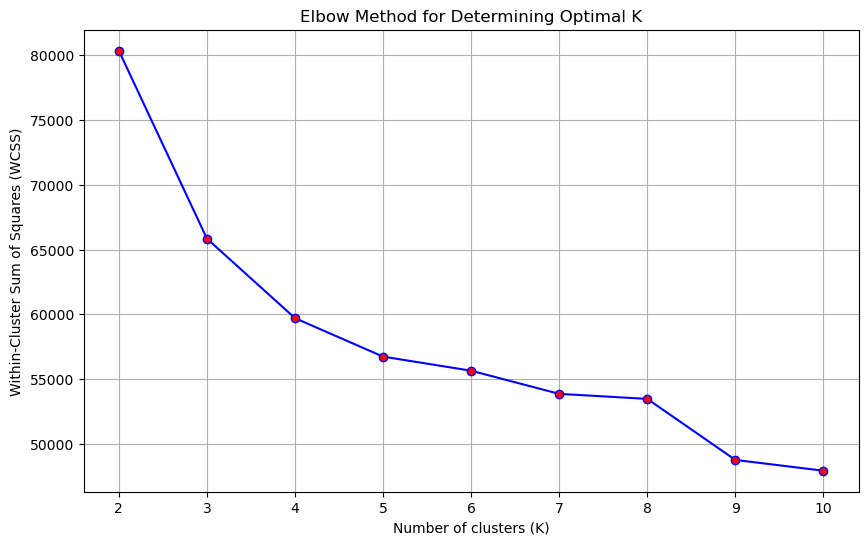

In [16]:
wcss=compute_wcss(data,10)
plot_wcss(wcss,10)

In [17]:
clustering=DivisiveHierarchicalClustering(data,4)
clustered_data,clustered_data_index=clustering.run()

[2. 1. 2. ... 3. 3. 3.]


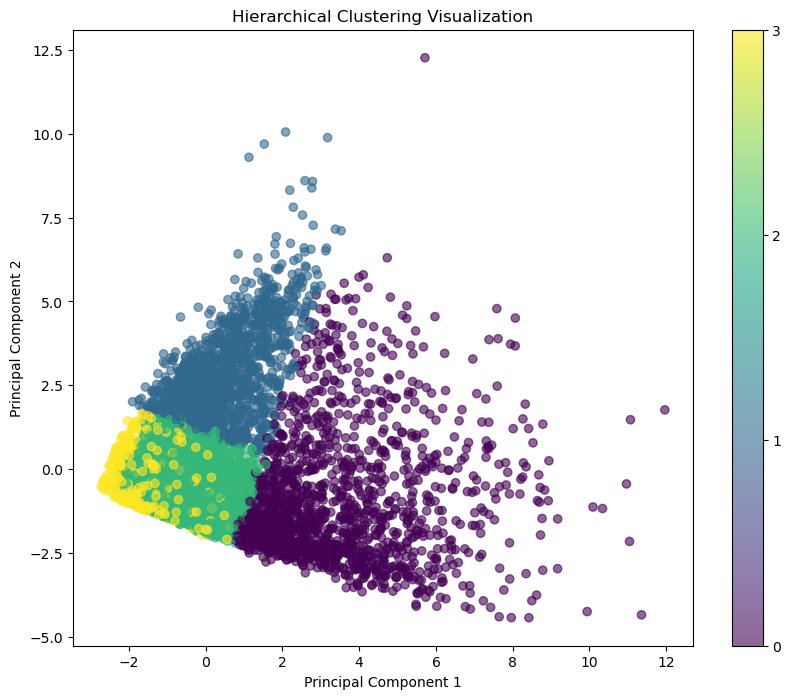

In [18]:
# Assuming 'data' is a DataFrame or a 2D NumPy array
labels = np.zeros(len(data))

for cluster_label, data_indices in clustered_data_index.items():
    labels[data_indices] = cluster_label
from sklearn.decomposition import PCA
print(labels)
pca = PCA(n_components=2)  # Choose 2 for 2D visualization
data_reduced = pca.fit_transform(data)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=np.unique(labels))
plt.savefig
plt.show()



In [19]:
from sklearn.decomposition import PCA

# Fit the PCA model to your data.
pca = PCA(n_components=2)
pca.fit(data)

# Get the loadings (the contribution of each original variable to each principal component)
loadings = pca.components_.T  # Transpose so that we have it in the shape [n_features, n_components]

# Now, match the loadings to your original features
feature_names = data.columns  # Replace with your actual feature names
pc1_loadings = loadings[:, 0]
pc2_loadings = loadings[:, 1]

# Create a DataFrame that will have the loading scores along with feature names
loading_scores = pd.DataFrame({'Feature': feature_names, 'PC1': pc1_loadings, 'PC2': pc2_loadings})

# Sort the loading scores based on the absolute values for PC1 and PC2
sorted_loading_scores_pc1 = loading_scores.sort_values('PC1', key=np.abs, ascending=False)
sorted_loading_scores_pc2 = loading_scores.sort_values('PC2', key=np.abs, ascending=False)

# Show the features that contribute the most to PC
print(sorted_loading_scores_pc2)

                             Feature       PC1       PC2
5                       CASH_ADVANCE  0.110193  0.488687
10                  CASH_ADVANCE_TRX  0.089420  0.417860
0                            BALANCE  0.267255  0.413202
14                  MINIMUM_PAYMENTS  0.232984  0.354116
2                          PURCHASES  0.434718 -0.254432
4             INSTALLMENTS_PURCHASES  0.332034 -0.241433
11                     PURCHASES_TRX  0.379720 -0.222907
3                   ONEOFF_PURCHASES  0.368504 -0.197184
12                      CREDIT_LIMIT  0.317853  0.156823
6                PURCHASES_FREQUENCY  0.096487 -0.120157
13                          PAYMENTS  0.370587  0.112813
8   PURCHASES_INSTALLMENTS_FREQUENCY  0.080380 -0.102960
9             CASH_ADVANCE_FREQUENCY  0.011349  0.087711
15                  PRC_FULL_PAYMENT  0.012588 -0.064237
7         ONEOFF_PURCHASES_FREQUENCY  0.087849 -0.056005
16                            TENURE  0.107567 -0.034868
1                  BALANCE_FREQ

In [20]:
from sklearn.metrics import silhouette_score
def compute_silhouette_scores(data, max_K):
    silhouette_scores = []

    for K in range(2, max_K + 1):
        clustering = DivisiveHierarchicalClustering(data, K)
        clustered_data,clustered_data_index = clustering.run()


        # Create the labels list
        labels = np.empty(data.shape[0], dtype=int)
        for cluster_id, indices in clustered_data_index.items():
            for index in indices:
                labels[index] = cluster_id

        # Calculate the silhouette score for these labels
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    return silhouette_scores

def plot_silhouette_scores(silhouette_scores, max_K):
    plt.figure(figsize=(10, 6))
    K_range = range(2, max_K + 1)
    plt.plot(K_range, silhouette_scores, 'bo-', markerfacecolor='red')
    plt.title('Silhouette Scores vs. Number of Clusters')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

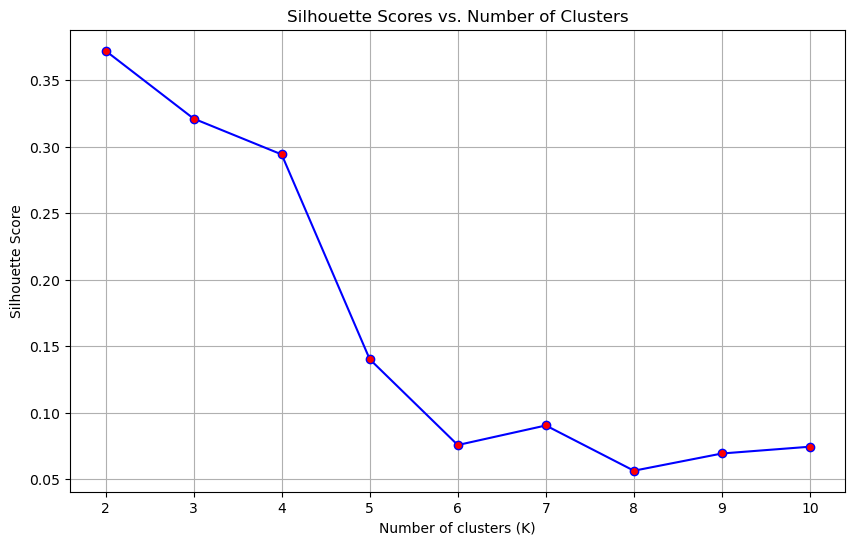

In [21]:
silhouette_scores=compute_silhouette_scores(data,10)
plot_silhouette_scores(silhouette_scores,10)